In [1]:
from datetime import datetime
import numpy as np
from numpy import expand_dims
from numpy.random import randint
from tensorflow.keras.datasets.cifar10 import load_data
import tensorflow as tf
import sys
sys.path.append("..")
from src.models.c_dcgan import GANColor
from src.models.train_helpers import CGanTrainer
import matplotlib.pyplot as plt

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

%matplotlib inline


def load_real_samples():
    (train_X, train_y), (_, _) = load_data()
#     x = expand_dims(train_X, axis=-1)
    x = train_X.astype('float32')
    x = (x - 127.5) / 127.5
    return [x, train_y]


def generate_real_samples(dataset, n_samples):
    images, labels = dataset
    ix = randint(0, images.shape[0], n_samples)
    images, labels = images[ix], labels[ix]
    return [images, labels]


# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, callbacks, n_epochs=100, n_batch=128):

    logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
    file_writer = tf.summary.create_file_writer(logdir + "/metrics")

    trainer = CGanTrainer(d_model, g_model, gan_model, batch_size=n_batch, n_classes=10, noise_dim=latent_dim)
    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    callbacks.on_train_begin()
    for i in range(n_epochs):
        for j in range(bat_per_epo):
            # callback.on_batch_begin(i)
            [x_real, labels_real] = generate_real_samples(dataset, half_batch)
            real_loss, fake_loss, gan_loss = trainer.train_step(x_real, labels_real, i)
            # callbacks.on_batch_end(
            #     i,
            #     logs={'real_loss': real_loss, 'fake_loss': fake_loss, 'gan_loss': gan_loss})

        with file_writer.as_default():
            tf.summary.scalar('real loss', data=real_loss, step=i)
            tf.summary.scalar('fake loss', data=fake_loss, step=i)
            tf.summary.scalar('gan loss', data=gan_loss, step=i)
            plot_buf = trainer.create_fig(i)
            image = tf.image.decode_png(plot_buf.getvalue(), channels=4)
            image = tf.expand_dims(image, 0)
            tf.summary.image('plot', data=image, step=i)
        
    
    print('EPOCH:', 0)
    # callbacks.on_train_end('_')
    g_model.save('cgan_generator.h5')


In [2]:
latent_dim = 100
gan = GANColor((32, 32, 3))
d_model = gan.discriminator
g_model = gan.generator
gan_model = gan.combined
dataset = load_real_samples()

log_path = './logs'
callback = tf.keras.callbacks.TensorBoard(log_path)
callback.set_model(gan_model)

# train model

0 0.678987 0.6959708 0.6908617
0 0.6049129 0.7040235 0.68328786
0 0.54046124 0.7216388 0.6669094
0 0.46720243 0.7552185 0.64103234
0 0.40869856 0.8078416 0.6091843
0 0.3633784 0.8647498 0.58959186
0 0.33649886 0.8945929 0.61000454
0 0.29680455 0.81773204 0.720225
0 0.30395335 0.6490766 0.90540564
0 0.34850013 0.5381949 1.0039821
0 0.31240728 0.5304406 0.97484046
0 0.28532863 0.5822998 0.86248946
0 0.29343045 0.6626994 0.7602389
0 0.29000977 0.8042271 0.64786255
0 0.2782675 1.0830714 0.5043837
0 0.31595352 1.5051467 0.3778708
0 0.28528002 1.7886429 0.34268716
0 0.3102736 1.6935766 0.4085793
0 0.33937865 1.2959833 0.6153029
0 0.37424698 0.78988564 1.0578656
0 0.4363737 0.42085046 1.5896933
0 0.42347634 0.31988904 1.6533439
0 0.4143718 0.37908864 1.3601077
0 0.36243308 0.5162709 1.0485933
0 0.39775276 0.6953664 0.79141515
0 0.4171712 0.9080368 0.60076416
0 0.2958377 1.1908307 0.48089388
0 0.30561805 1.4974333 0.39053154
0 0.35508394 1.5776935 0.40675884
0 0.28894335 1.3845075 0.49823022
0

0 0.6743318 0.5778736 0.9619199
0 0.55104494 0.6388916 0.8704814
0 0.60613644 0.6492295 0.8299968
0 0.6125564 0.69360054 0.8137622
0 0.5589071 0.68541 0.8209111
0 0.6161671 0.64389575 0.8579861
0 0.6057819 0.62322646 0.8877667
0 0.6683408 0.6191721 0.90319693
0 0.7181541 0.6533084 0.84113854
0 0.6286924 0.6680865 0.82593775
0 0.7032401 0.6455414 0.82895374
0 0.6138997 0.6516866 0.8481326
0 0.6371997 0.65704584 0.84045744
0 0.6329536 0.67331517 0.82880056
0 0.6486305 0.6734149 0.79427576
0 0.6391791 0.69547296 0.763551
0 0.64585423 0.69643885 0.7664114
0 0.6325161 0.6743317 0.77637464
0 0.59940404 0.6610819 0.8003826
0 0.6397761 0.64312637 0.8197689
0 0.65053666 0.6670175 0.8099806
0 0.683664 0.6525602 0.7963802
0 0.6545503 0.6843343 0.76609355
0 0.62860477 0.6862384 0.7212705
0 0.6526531 0.7548196 0.6976515
0 0.5823885 0.8069393 0.6309115
0 0.623415 0.8741275 0.60768074
0 0.6195034 0.8685179 0.6066314
0 0.5782195 0.8743646 0.6283679
0 0.5657259 0.83951306 0.6558411
0 0.61668396 0.73759

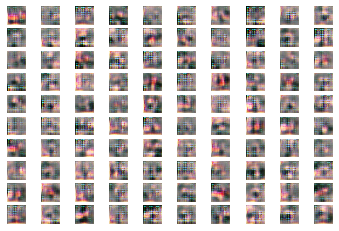

1 0.59193945 0.72904766 0.70094204
1 0.5740603 0.77407604 0.6707773
1 0.5014361 0.80574507 0.6675932
1 0.4736784 0.78416705 0.6562869
1 0.5116383 0.81179273 0.67960155
1 0.44913083 0.78647375 0.7160703
1 0.53332746 0.7161019 0.76296175
1 0.5195646 0.6784761 0.8203664
1 0.48230338 0.70742667 0.80387056
1 0.45953164 0.77241564 0.7667943
1 0.5208428 0.7765558 0.6762506
1 0.5241879 0.8819551 0.61492705
1 0.49555093 0.9268115 0.59598714
1 0.52139914 0.94053173 0.6145588
1 0.52261674 0.86148775 0.63028526
1 0.5832155 0.85291326 0.71108407
1 0.57145107 0.7469425 0.7963335
1 0.6467385 0.66903687 0.8590754
1 0.66457033 0.65107393 0.8755579
1 0.7315476 0.7025155 0.82847667
1 0.6906158 0.71881187 0.7482699
1 0.72406226 0.77645266 0.6697533
1 0.64278764 0.7940032 0.6696524
1 0.6685188 0.8398862 0.65651476
1 0.69075 0.8746204 0.6966348
1 0.6542233 0.78695554 0.7067161
1 0.69215846 0.7400163 0.76950675
1 0.7060534 0.67040706 0.822379
1 0.68414134 0.62326825 0.9125322
1 0.69455516 0.5563899 0.9390078

1 0.61632466 0.6882616 0.7957678
1 0.6443079 0.6326206 0.8759415
1 0.67764616 0.5922588 0.9124847
1 0.67366445 0.58393335 0.9028129
1 0.6896968 0.5797015 0.909572
1 0.7109393 0.6060951 0.8754791
1 0.68587047 0.6349197 0.85515684
1 0.72554076 0.64605856 0.8528967
1 0.68712205 0.66841793 0.79780746
1 0.6728091 0.6891091 0.7837373
1 0.6892211 0.7241272 0.7438453
1 0.6772001 0.79153514 0.6890935
1 0.66749895 0.771894 0.7340034
1 0.69379705 0.6876565 0.78601557
1 0.65737164 0.6712341 0.8456434
1 0.65968764 0.622835 0.9389318
1 0.65413654 0.511086 1.0107863
1 0.66024107 0.4931068 1.1196393
1 0.6624649 0.45386803 1.1399119
1 0.6640656 0.48345503 1.1089249
1 0.64239454 0.50527585 1.0102751
1 0.6096389 0.5492352 0.90371525
1 0.64065915 0.5836731 0.8499272
1 0.6271459 0.641315 0.8061843
1 0.5771519 0.6794931 0.7519584
1 0.5809176 0.72030234 0.74036336
1 0.5516569 0.7213058 0.6980129
1 0.5611199 0.73627585 0.6836218
1 0.5305157 0.7857845 0.6582771
1 0.57279795 0.7961105 0.649488
1 0.50538623 0.80

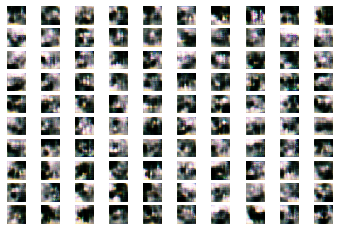

2 0.7114318 0.6451298 0.78510517
2 0.7144444 0.6378697 0.8379923
2 0.699563 0.58681804 0.8618252
2 0.6580367 0.56858486 0.887133
2 0.7012133 0.5723454 0.90287864
2 0.6609622 0.5466958 0.92025614
2 0.66742396 0.5411139 0.92927194
2 0.7199897 0.58370614 0.9024433
2 0.7493615 0.5924994 0.84018946
2 0.66690266 0.6461301 0.8078551
2 0.66301197 0.66564 0.75886714
2 0.65045345 0.67640865 0.76305294
2 0.6988739 0.6966368 0.72755504
2 0.64362144 0.7204453 0.70392764
2 0.63441384 0.7256261 0.6973431
2 0.6908151 0.7585367 0.69538987
2 0.6770061 0.72943974 0.7041441
2 0.6657015 0.7238241 0.7306613
2 0.6491332 0.69737625 0.77955234
2 0.68015444 0.6516152 0.79629076
2 0.6195471 0.64135265 0.8416299
2 0.6319175 0.6002693 0.9063104
2 0.61607426 0.5641639 0.99019116
2 0.66071284 0.52693963 0.95704097
2 0.6009401 0.5457834 0.9129207
2 0.5486295 0.5340419 0.9236936
2 0.63953674 0.55583346 0.9035532
2 0.5851556 0.59046614 0.8380998
2 0.5271407 0.6252712 0.8114909
2 0.5543857 0.6913097 0.7317265
2 0.544822

2 0.70450914 0.6369585 0.85962397
2 0.70510244 0.61370075 0.8646531
2 0.7211699 0.61865115 0.8937255
2 0.6977233 0.5919881 0.8669671
2 0.72983944 0.60407674 0.8473997
2 0.7341359 0.6739583 0.81743836
2 0.7222584 0.67772627 0.7733556
2 0.73330224 0.6978439 0.74036694
2 0.75135726 0.70701784 0.7375301
2 0.70823795 0.69752395 0.7254159
2 0.7563746 0.71650624 0.7133631
2 0.7408438 0.70725596 0.70369285
2 0.72279483 0.71517074 0.7079444
2 0.7153516 0.6878134 0.74258935
2 0.7143862 0.66900355 0.75311154
2 0.71553993 0.68903375 0.75495243
2 0.7566784 0.66819483 0.7760672
2 0.72580385 0.6620165 0.7850752
2 0.7355154 0.6462852 0.77684635
2 0.72752064 0.65379345 0.7638119
2 0.7124373 0.6683315 0.7704196
2 0.68079334 0.6714071 0.7899159
2 0.7005768 0.67913353 0.78986734
2 0.6791017 0.6327629 0.78915477
2 0.6862029 0.6602503 0.77826285
2 0.66721916 0.65291625 0.77575403
2 0.6591978 0.6568625 0.7926583
2 0.6747713 0.68125623 0.7774799
2 0.67835903 0.6406187 0.77276087
2 0.6707854 0.6603036 0.770276

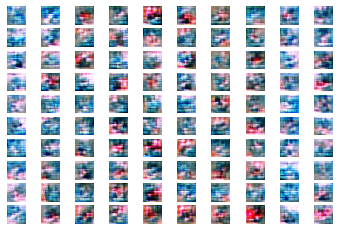

3 0.653206 0.5479624 1.0071499
3 0.6506455 0.5566525 0.92391
3 0.63482225 0.6069789 0.8508713
3 0.61543643 0.6386938 0.7890896
3 0.62525403 0.70828646 0.7403793
3 0.61758834 0.7306504 0.66142875
3 0.5947652 0.7683797 0.6684041
3 0.58399093 0.8229582 0.66179323
3 0.5973065 0.7946321 0.6593944
3 0.5690198 0.7927172 0.6764581
3 0.59852815 0.71730256 0.7416746
3 0.6489647 0.6736775 0.86217767
3 0.64336544 0.6120875 0.9153348
3 0.65915716 0.54722345 0.92226964
3 0.7093435 0.5819075 0.8923122
3 0.66549706 0.63889724 0.84940577
3 0.62866974 0.6492152 0.77560675
3 0.64141154 0.69111526 0.6912409
3 0.64861655 0.794181 0.6770476
3 0.67081434 0.7996797 0.63864386
3 0.67433536 0.80607474 0.6676172
3 0.64440227 0.7883383 0.7056191
3 0.6049937 0.73928285 0.73453915
3 0.67124987 0.68555903 0.76458704
3 0.6707624 0.67354596 0.803262
3 0.6555059 0.7307312 0.7596497
3 0.6550696 0.7594212 0.7139276
3 0.6828841 0.762468 0.6972659
3 0.67783844 0.73882186 0.7198787
3 0.65075946 0.74563396 0.72197556
3 0.694

3 0.647815 0.67278886 0.7716691
3 0.70270425 0.666936 0.81908965
3 0.6754259 0.5938784 0.8807373
3 0.68876886 0.5928564 0.8838998
3 0.68213713 0.60607475 0.8754136
3 0.7162065 0.623343 0.8174278
3 0.69608116 0.63840735 0.786564
3 0.68009424 0.6392207 0.768798
3 0.69960886 0.66877425 0.7486532
3 0.6836215 0.670009 0.7575387
3 0.6468106 0.6927932 0.75893867
3 0.66274273 0.65913904 0.7434889
3 0.6838038 0.6638102 0.7704778
3 0.6986743 0.6786789 0.75801325
3 0.70009005 0.68483806 0.7728685
3 0.7027688 0.75395006 0.7794125
3 0.6803472 0.69656885 0.738179
3 0.6948774 0.7023496 0.72722405
3 0.69759905 0.6834701 0.7447174
3 0.6967442 0.6969061 0.75154495
3 0.62818307 0.68579227 0.74195135
3 0.6424007 0.66773546 0.75267637
3 0.6735842 0.6851973 0.7180815
3 0.6584549 0.6868677 0.7447134
3 0.62729514 0.6882814 0.7485513
3 0.63707775 0.7114564 0.7394862
3 0.63227844 0.6870672 0.7335647
3 0.61018854 0.6894332 0.7428249
3 0.6054362 0.67711174 0.75488347
3 0.6264851 0.6593521 0.7382068
3 0.5970899 0.

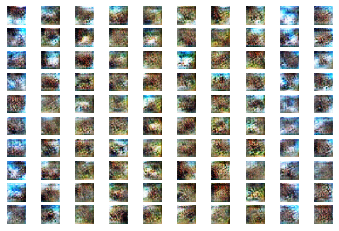

4 0.6144583 0.7593867 0.67642725
4 0.6291952 0.7264264 0.69658417
4 0.64506996 0.73670614 0.69924784
4 0.6389366 0.7574187 0.6964948
4 0.63141054 0.7372577 0.7010871
4 0.63805 0.75228906 0.7174605
4 0.6127317 0.74898756 0.7092263
4 0.6201984 0.71441793 0.74288344
4 0.61846507 0.7256251 0.7574469
4 0.6119228 0.6685331 0.79013014
4 0.61791027 0.68264556 0.78371453
4 0.6318644 0.7044231 0.7753842
4 0.6316984 0.695843 0.72179735
4 0.5820639 0.8032263 0.64382523
4 0.6042221 0.82967067 0.6516796
4 0.5969828 0.8130292 0.6756892
4 0.6720881 0.8005387 0.71847975
4 0.6628053 0.72567064 0.7832742
4 0.67421997 0.68860674 0.8476033
4 0.730754 0.6057365 0.8803178
4 0.6872262 0.6063089 0.87248254
4 0.66971624 0.61075944 0.8671062
4 0.69794285 0.6791992 0.8084995
4 0.76599884 0.69959277 0.77164733
4 0.69306386 0.72566587 0.76516676
4 0.77398574 0.69787836 0.7506349
4 0.74831307 0.6757843 0.74665725
4 0.74267703 0.7087298 0.79201317
4 0.7135545 0.6850284 0.83555096
4 0.7236686 0.6377783 0.87043595
4 0.

4 0.6800288 0.65143585 0.78798217
4 0.6761411 0.6436024 0.800456
4 0.68051827 0.6623157 0.79658455
4 0.6629333 0.6841411 0.7546145
4 0.6884709 0.69093275 0.76204056
4 0.6560277 0.71641433 0.73406863
4 0.63338983 0.71921045 0.7431097
4 0.65466976 0.72019637 0.72169876
4 0.6570185 0.72043705 0.72098696
4 0.63780206 0.72034967 0.7477005
4 0.64132833 0.70699817 0.73378617
4 0.66569805 0.72391427 0.7215494
4 0.65738344 0.7036854 0.7204792
4 0.69310117 0.7130956 0.7675985
4 0.71997887 0.6719134 0.7676946
4 0.69080794 0.6768332 0.7806307
4 0.6857447 0.65875447 0.77342695
4 0.7008846 0.6266196 0.80325454
4 0.71249354 0.6047615 0.7957646
4 0.70758057 0.62330794 0.85184723
4 0.708357 0.6367855 0.8442031
4 0.6913995 0.6265739 0.8287693
4 0.7055625 0.6670362 0.7899744
4 0.7210697 0.66557586 0.7368077
4 0.7211673 0.679122 0.79243326
4 0.71653503 0.6946893 0.7259168
4 0.69814146 0.689238 0.73307073
4 0.64602864 0.70460296 0.74729306
4 0.65750515 0.68729925 0.75469244
4 0.6812071 0.6931314 0.7910178


In [ ]:
train(g_model, d_model, gan_model, dataset, latent_dim, callback, 128)

In [1]:
%load_ext tensorboard
%tensorboard --logdir logs --bind_all